**Share of Search**

Ferramenta para comparar a pontuação na pesquisa Google entre diferentes marcas/termos.

---

Passos para executar:

* Altere os valores das variáveis abaixo:

> MARCAS: marcas a serem pesquisadas 

> CORES: cores em que as marcas serão exibidas no gráfico

> DATAS: filtro do range de datas 

> CATEGORIA: filtro de categoria (todas as categorias disponíveis em: https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)

* Clique em 'Runtime' e 'Run All' (ou Ctrl + F9)



In [34]:
MARCAS = ['flamengo', 'fluminense', 'vasco', 'botafogo']
CORES = ['red', 'pink', 'grey', 'yellow']
DATAS = '2020-01-01 2022-12-31'
CATEGORIA = 20

In [35]:
if len(MARCAS) != len(CORES):
  raise Exception("[ERRO] É necessário ter a mesma quantidade de marcas e cores!")

In [36]:
! pip install pytrends
! pip install matplotlib

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pytrends.request import TrendReq

pytrends = TrendReq(hl='pt-BR', tz=360)

In [38]:
df_cat = pd.read_csv('categorias.csv')
df_cat.head()

desc_categoria = df_cat.loc[df_cat['codigo']==CATEGORIA]['categoria'].to_list()[0]
desc_categoria

'Sports'

In [39]:
pytrends.build_payload(kw_list= MARCAS, timeframe= DATAS, geo= 'BR', cat= CATEGORIA)
df = pytrends.interest_over_time()
df.head()

,flamengo,fluminense,vasco,botafogo,isPartial
date,,,,,
2020-01-05,15,2,3,2,False
2020-01-12,24,2,4,2,False
2020-01-19,33,4,14,4,False
2020-01-26,27,10,5,5,False
2020-02-02,34,4,4,5,False


Text(0, 0.5, 'Pontuação da Pesquisa')

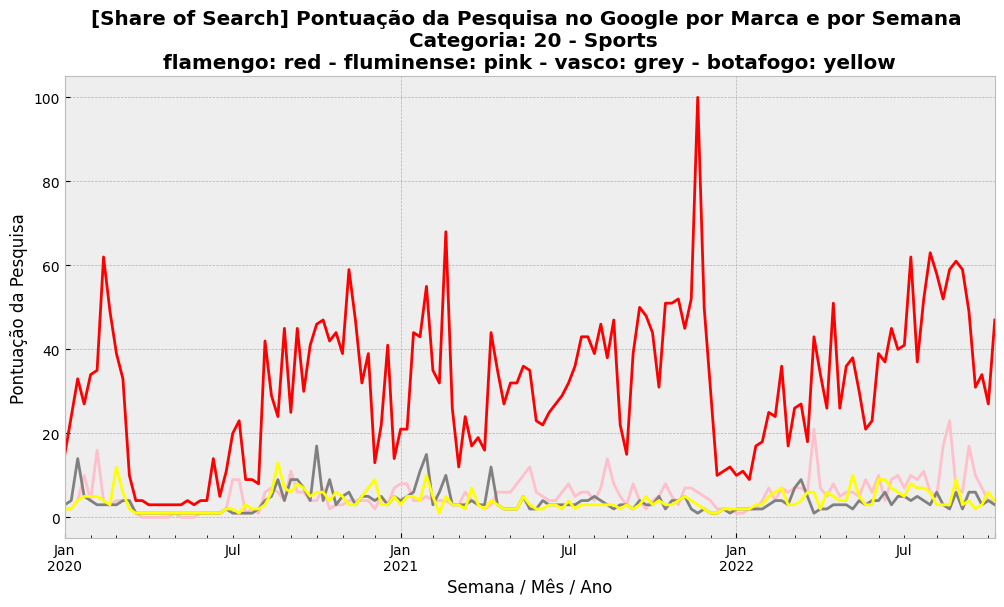

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
titulo = '[Share of Search] Pontuação da Pesquisa no Google por Marca e por Semana \n Categoria: ' + str(CATEGORIA) + ' - '+ desc_categoria +'\n'
for i in range(len(MARCAS)):
  df[MARCAS[i]].plot(color= CORES[i])
  if i != 0:
    titulo = titulo + ' - '
  titulo += MARCAS[i] + ': ' + CORES[i]
plt.title(titulo, fontweight='bold')
plt.xlabel('Semana / Mês / Ano')
plt.ylabel('Pontuação da Pesquisa')

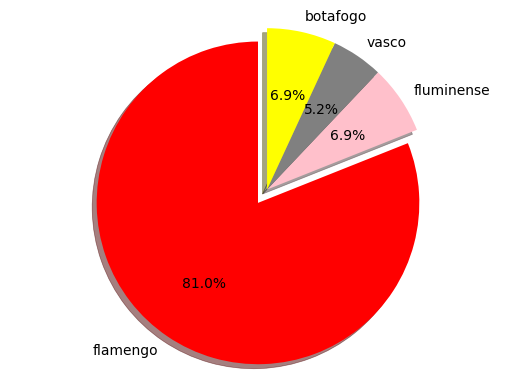

In [41]:
labels = MARCAS
sizes = df.iloc[-1].to_list()
del sizes[-1] # retirando ultimo valor (TRUE/FALSE)

explode = [0.1]
for i in range(len(MARCAS)-1): # adicionando 0s para explode do grafico
  explode.append(0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=CORES, explode= explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()